In [1]:
import pandas
import os
import matplotlib.pyplot
import numpy

In [2]:
def load_rounds():
    def read(df: pandas.DataFrame) -> dict:
        objects = {}
        for idx, row in df.iterrows():
            objects[row['ID'].split('-')[0]] = {
                metric: row[metric]
                for metric in ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'accumulated_waiting_time_mean', 'waiting_time_mean']
            }
        return objects

    def arrange(rounds: list[dict]):
        objects: dict = {}
        for round in rounds:
            for object_key, object_data in round[0].items():
                if object_key not in objects:
                    objects[object_key] = {}
                objects[object_key] = {
                    metric: (objects[object_key].get(metric) or []) + [value]
                    for metric, value in object_data.items()
                }
        return objects
    
    def fetch():
        rounds = []
        for file in os.listdir('rounds'):
            path = os.path.join('rounds', file)
            id = int(file.split('.')[0])
            round = read(pandas.read_csv(path))
            rounds.append((round, id))
        rounds = sorted(rounds, key = lambda k: k[1])
        return arrange(rounds)

    return fetch()
rounds = load_rounds()
rounds

{'fixed': {'arrival_rate_mean': [1.9839951683527104,
   1.9879700005033472,
   1.9798283585845875,
   1.5546061146784955,
   1.986499068901304,
   1.5918772540494353,
   1.984623708680936,
   1.893175335201498,
   1.734386388197743,
   1.988624351940404],
  'departure_rate_mean': [1.983315717952589,
   1.9873282327477728,
   1.9791614234660493,
   1.5560135211550783,
   1.985832200916,
   1.5932972266552734,
   1.9839945641916124,
   1.894469646514784,
   1.7358440775088593,
   1.9879574168218652],
  'speed_mean': [9.814196192351517,
   9.812609695704554,
   9.806354140133989,
   9.52770195578405,
   9.81718674507354,
   9.537381176665656,
   9.812213591575487,
   9.675197637428058,
   9.558371255410943,
   9.809389007672133],
  'accumulated_waiting_time_mean': [54.49051452891168,
   53.69930884046709,
   62.27873476992599,
   213.30900812450977,
   54.51392175184069,
   216.08709748609712,
   54.40370793603485,
   105.18888030194552,
   151.8638016264893,
   53.42964474543359],
  'wai

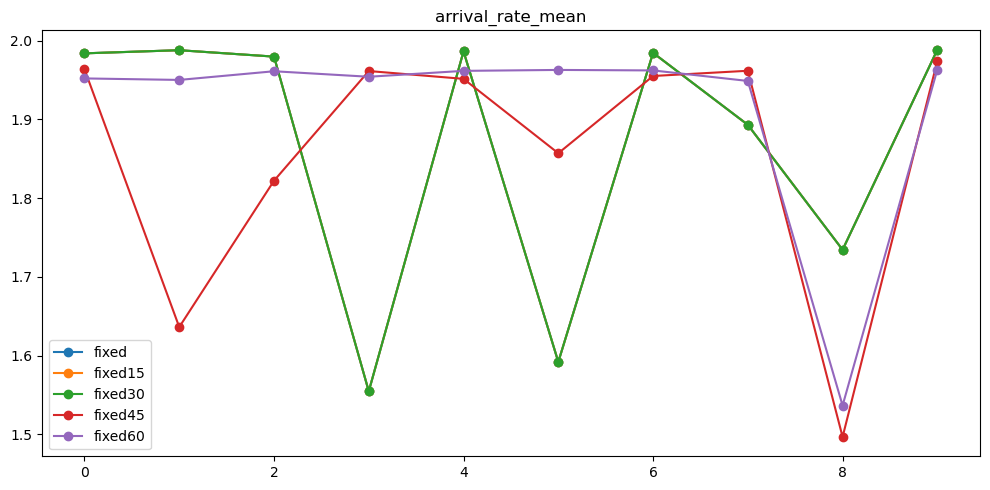

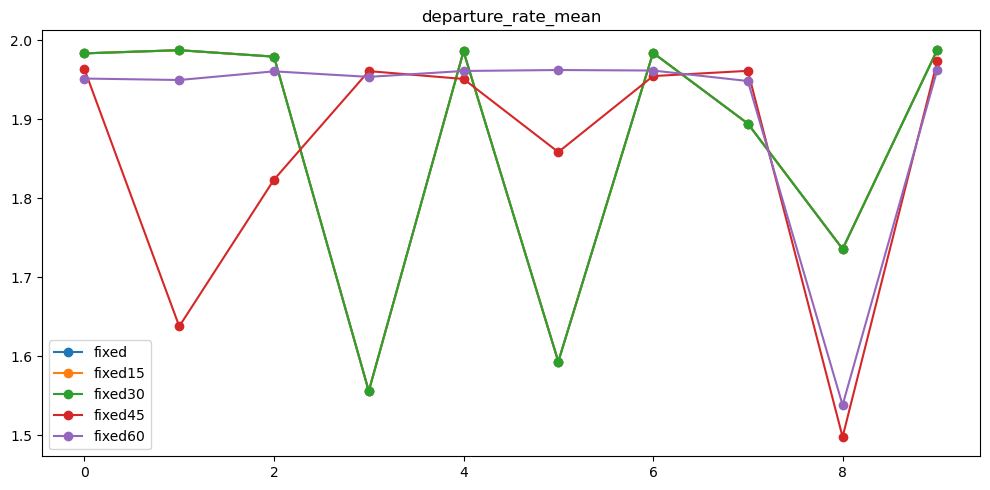

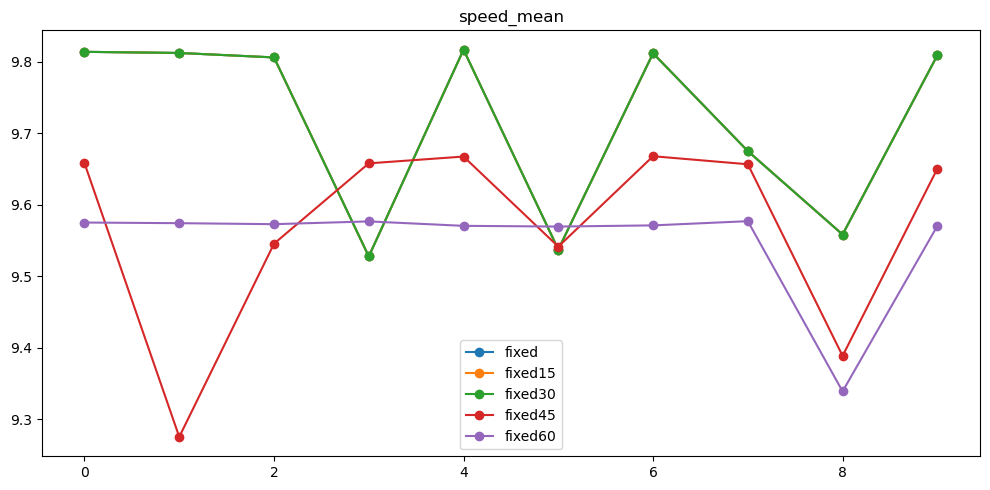

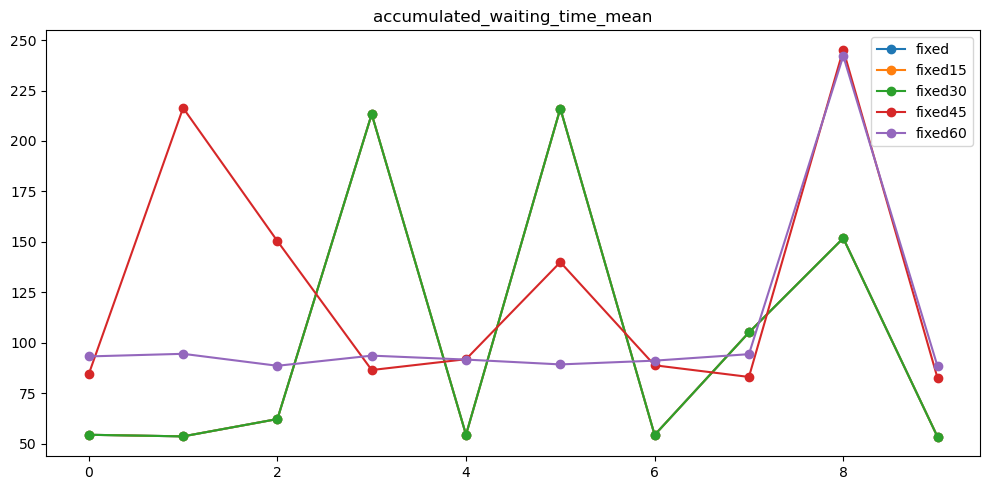

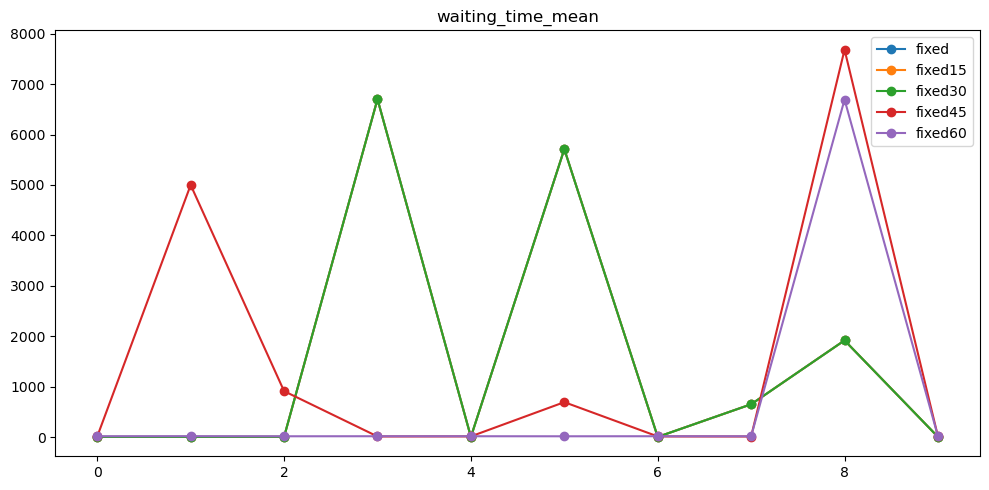

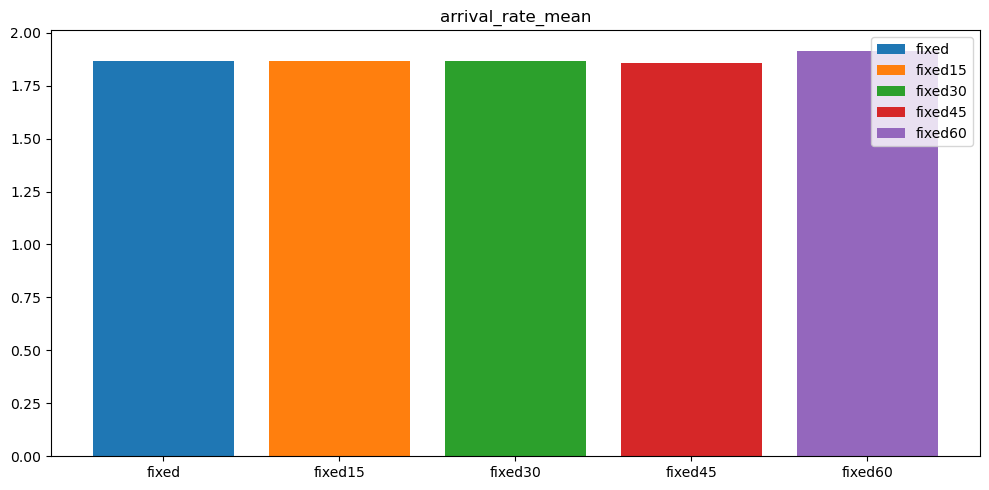

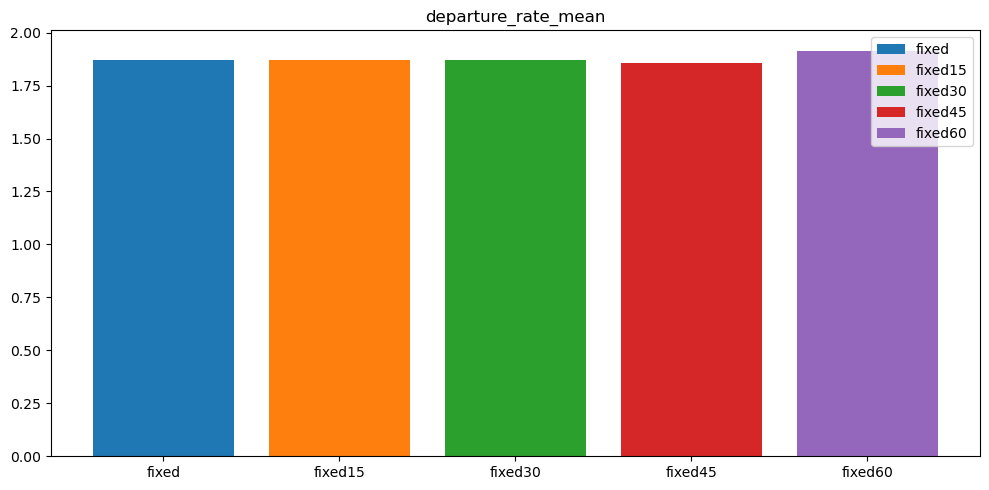

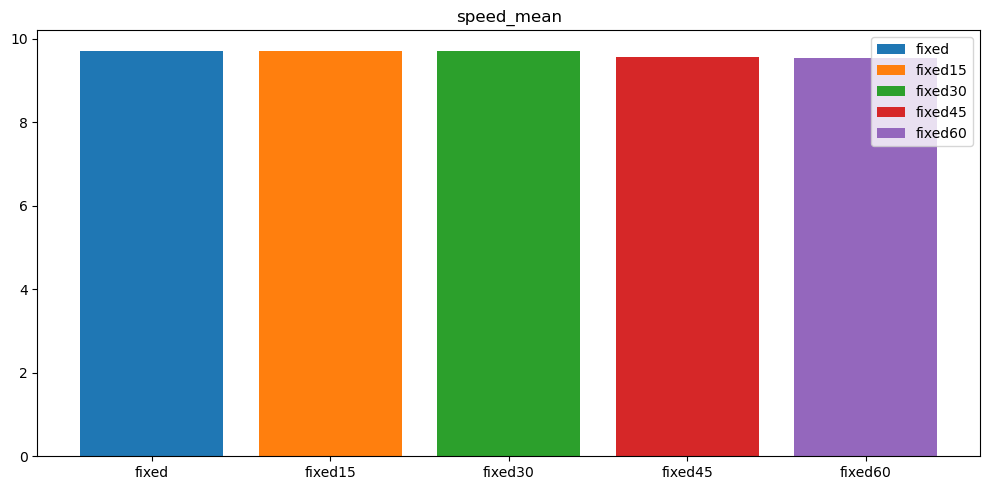

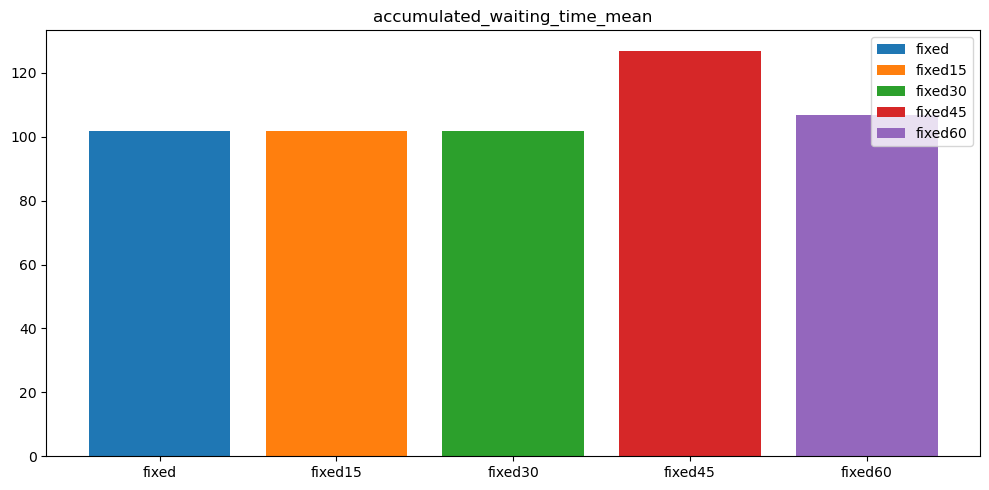

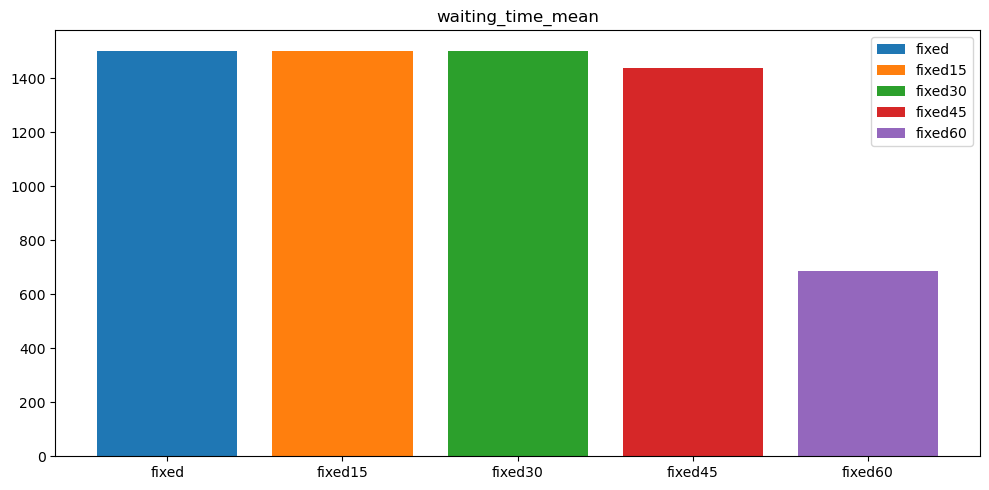

In [3]:
def extract_metric(rounds: dict, metric: str):
    result = {}
    for object_key, object_data in rounds.items():
        result[object_key] = object_data[metric]
    return result

def plot_metrics(rounds: dict, metrics: list[str], mean: bool = False):
    for metric in metrics:
        metric_data = extract_metric(rounds, metric)
        fig = matplotlib.pyplot.figure(figsize=(10, 5))
        for object_key, object_value in metric_data.items():
            Ys = object_value
            Xs = list(range(len(Ys)))
            if mean:
                Ys = [numpy.mean(Ys)] * len(Xs)
                matplotlib.pyplot.plot(Xs, Ys, label=object_key)
            else:
                matplotlib.pyplot.plot(Xs, Ys, label=object_key, marker='o')
        matplotlib.pyplot.title(metric)
        matplotlib.pyplot.legend()
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()

def bar_metrics(rounds: dict, metrics: list[str]):
    for metric in metrics:
        metric_data = extract_metric(rounds, metric)
        fig = matplotlib.pyplot.figure(figsize=(10, 5))
        for object_key, object_value in metric_data.items():
            matplotlib.pyplot.bar(object_key, numpy.mean(object_value), label=object_key)
        matplotlib.pyplot.title(metric)
        matplotlib.pyplot.legend()
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()


plot_metrics(rounds, ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'accumulated_waiting_time_mean', 'waiting_time_mean'], mean=False)
bar_metrics(rounds, ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'accumulated_waiting_time_mean', 'waiting_time_mean'])

In [4]:
def fibonacci(nums: int) -> list[int]:
    if nums < 0:
        raise ValueError(nums)
    elif nums == 0:
        return []
    elif nums == 1:
        return [1]
    else:
        arr = [1, 2]
        for i in range(2, nums):
            arr.append(arr[-1] + arr[-2])
        return arr

def assign_points(objects: dict[str, dict], metric: str, higher_is_better: bool = True) -> dict:
    sorted_object_keys: list[str] = []
    if higher_is_better:
        sorted_object_keys = sorted(list(objects.keys()), key = lambda obj: numpy.mean(objects[obj][metric]))
    else:
        sorted_object_keys = sorted(list(objects.keys()), key = lambda obj: -numpy.mean(objects[obj][metric]))
    results = {}
    for idx, obj_points in enumerate(fibonacci(len(sorted_object_keys))):
        results[sorted_object_keys[idx]] = obj_points
    return results

def update_points(consolidated_points: dict, round_points: dict) -> dict:
    results = {}
    for obj_key, obj_points in round_points.items():
        results[obj_key] = (consolidated_points.get(obj_key) or 0) + round_points[obj_key]
    return results

def leaderboard(objects: dict, metrics: list[tuple[str, bool]]) -> dict:
    results = {}
    for (metric, higher_is_better) in metrics:
        round_points = assign_points(objects, metric, higher_is_better)
        print(round_points)
        results = update_points(results, round_points)
    return results

leaderboard(rounds, [
    ('arrival_rate_mean', True),
    ('departure_rate_mean', True),
    ('speed_mean', True),
    ('waiting_time_mean', False),
    ('accumulated_waiting_time_mean', False)
])

{'fixed45': 1, 'fixed': 2, 'fixed15': 3, 'fixed30': 5, 'fixed60': 8}
{'fixed45': 1, 'fixed': 2, 'fixed15': 3, 'fixed30': 5, 'fixed60': 8}
{'fixed60': 1, 'fixed45': 2, 'fixed': 3, 'fixed15': 5, 'fixed30': 8}
{'fixed': 1, 'fixed15': 2, 'fixed30': 3, 'fixed45': 5, 'fixed60': 8}
{'fixed45': 1, 'fixed60': 2, 'fixed': 3, 'fixed15': 5, 'fixed30': 8}


{'fixed45': 10, 'fixed60': 27, 'fixed': 11, 'fixed15': 18, 'fixed30': 29}